<a href="https://colab.research.google.com/github/bbhavii/Project-Work/blob/main/Fraud%20Detection%20using%20Customer%20Transaction%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
data = pd.read_csv('Fraud.csv')

In [248]:
display(data)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [249]:
data = data.dropna()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['type_encoded'] = label_encoder.fit_transform(data['type'])
data = data.drop(columns=['type'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']] = scaler.fit_transform(
    data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']])

data['hour'] = data['step'] % 24
data['day'] = (data['step'] // 24) % 7
data.groupby(['day']).mean()['isFraud'].value_counts

<ipython-input-249-62514effbf70>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['day']).mean()['isFraud'].value_counts


<bound method IndexOpsMixin.value_counts of day
0    0.000856
1    0.000995
2    0.001702
3    0.001989
4    0.002737
5    0.001109
6    0.001213
Name: isFraud, dtype: float64>

<ipython-input-250-b5167152e551>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


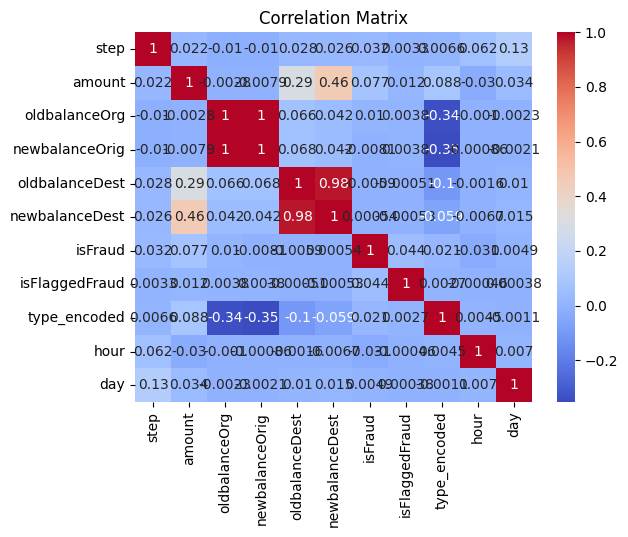

In [250]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [251]:
data = data.drop(columns=['oldbalanceOrg','oldbalanceDest','nameOrig','nameDest'])

In [241]:
data_reduced = data.loc[data['isFraud']==1]
data_reduced = data_reduced.append(data.loc[data['isFraud']==0][:20000])
display(data_reduced)

<ipython-input-241-499609e54e04>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_reduced = data_reduced.append(data.loc[data['isFraud']==0][:20000])


,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_encoded,hour,day
2,0.000002,0.000000,0.000000,1,0,4,1,0
3,0.000002,0.000000,0.000000,1,0,1,1,0
251,0.000030,0.000000,0.000000,1,0,4,1,0
252,0.000030,0.000000,0.000000,1,0,1,1,0
680,0.000218,0.000000,0.000000,1,0,4,1,0
...,...,...,...,...,...,...,...,...
20076,0.001534,0.055227,0.005034,0,0,0,8,0
20077,0.006837,0.067974,0.000000,0,0,0,8,0
20078,0.001629,0.071012,0.001987,0,0,0,8,0
20079,0.000580,0.072093,0.000000,0,0,0,8,0


<Axes: >

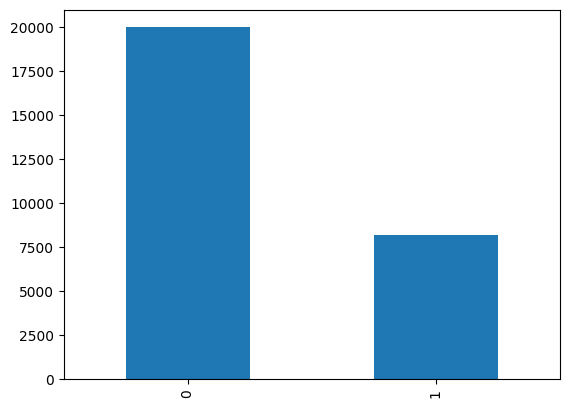

In [252]:
data_reduced['isFraud'].value_counts().plot(kind = 'bar')

In [253]:
from sklearn.model_selection import train_test_split
X = data_reduced.drop(columns='isFraud')
y = data_reduced['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size = 0.3)

In [254]:
y_train_val.value_counts()

0    9771
1    4053
Name: isFraud, dtype: int64

ACCURACY OF THE MODEL:  0.9926748582230623


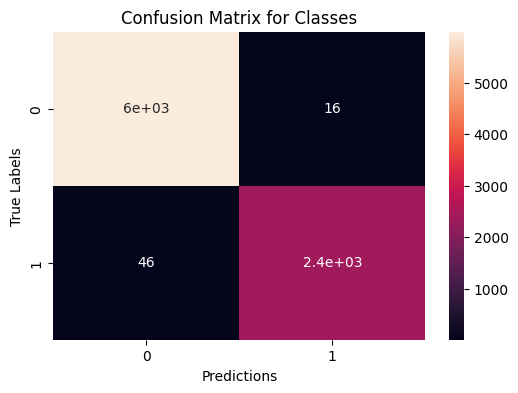

In [255]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(tf.math.confusion_matrix(
    y_test,
    y_pred,
    num_classes=2),annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predictions')
plt.title('Confusion Matrix for Classes')
plt.show();

ACCURACY OF THE MODEL:  0.9894848771266541


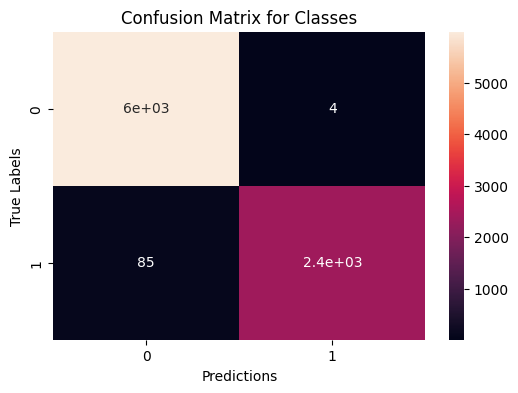

In [257]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ",metrics.accuracy_score(y_test,y_pred))
#to test the created model

plt.figure(figsize=(6,4))
sns.heatmap(tf.math.confusion_matrix(
    y_test,
    y_pred,
    num_classes=2),annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predictions')
plt.title('Confusion Matrix for Classes')
plt.show();

In [258]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(data_reduced['isFraud']),
                                        y = data_reduced['isFraud']
                                    )
class_weights = dict(zip([0,1,2], class_weights))
print('Class Weights for training set :',class_weights)

Class Weights for training set : {0: 0.705325, 1: 1.7175818823815903}


In [263]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(X_train_val.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train_val,
                    y_train_val,
                    epochs = 3,
                    batch_size = 32,
                    verbose = 1,
                    class_weight = class_weights,
                    validation_data = (X_test_val,y_test_val))

Epoch 1/3
432/432 [==============================] - 5s 5ms/step - loss: 0.1813 - accuracy: 0.9484 - val_loss: 0.1059 - val_accuracy: 0.9809
Epoch 2/3
432/432 [==============================] - 2s 4ms/step - loss: 0.1320 - accuracy: 0.9761 - val_loss: 0.0801 - val_accuracy: 0.9833
Epoch 3/3
432/432 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9807 - val_loss: 0.0847 - val_accuracy: 0.9811


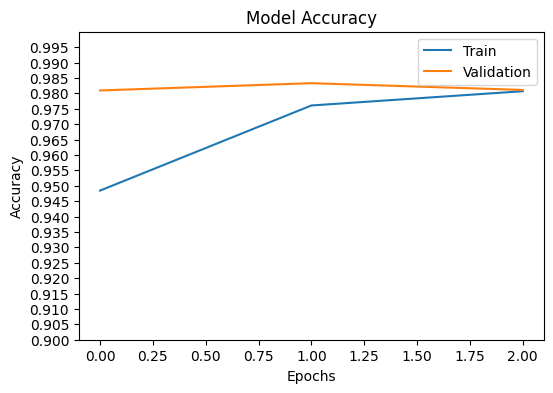

In [264]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylim(0.9,1.0)
plt.yticks(np.arange(0.9,1.0,0.005))
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

265/265 [==============================] - 0s 1ms/step
Test Accuracy:  0.9832231


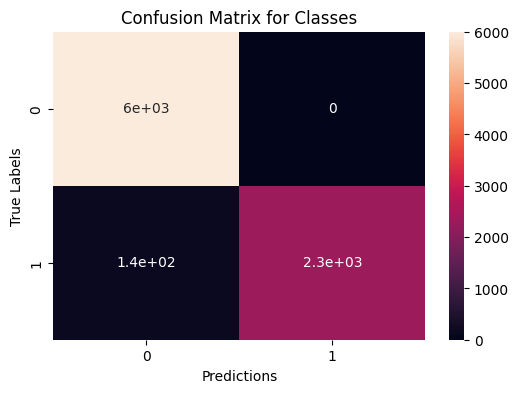

In [265]:
predictions = model.predict(X_test)

threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

metrics = tf.keras.metrics.Accuracy()
metrics.update_state(binary_predictions , y_test)
print('Test Accuracy: ', metrics.result().numpy())

plt.figure(figsize=(6,4))
sns.heatmap(tf.math.confusion_matrix(
    y_test,
    binary_predictions,
    num_classes=2),annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predictions')
plt.title('Confusion Matrix for Classes')
plt.show();